#### Documentacion

https://www.youtube.com/watch?v=PaFPbb66DxQ

https://www.youtube.com/watch?v=nk2CQITm_eo

https://statologos.com/regresion-lineal/

# Regresión lineal

Hacer una regresión significa definir una **recta** que mejor represente los datos. La que mejor representa la **relación entre dos variables**. De alguna manera es como si calculáramos la media, para que viendo un solo indicador entender mejor cómo son nuestros datos.

En definitiva lo que vamos a hacer es definir una función matemática.

$$Y = m * X + n$$
$m$ es la pendiente  
$n$ es el valor de $Y$ cuando $X=0$          
Y tenemos que:
$$nota = m * horas + n$$
Queremos encontrar $m$ y $n$ que modelen *mejor* nuestros datos



El **objetivo final** de la regresión es usarla como predictora, es decir, introducir en la función el valor de una variable (en este caso horas) y que nos prediga qué valor tomará la otra (nota), intentando ser lo más precisos posible.

- La variable explicativa/independiente/predictora es horas

- La variable objetivo/dependiente es nota

Imagina que tenemos un gráfico de dispersión (scatter), en la que vemos una nube de puntos, la recta que estamos buscando pasa por encima, y lo más cerca posible, de cada uno de esos puntos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={"figure.figsize": (15.,8.)})

from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
data = pd.read_csv('/content/sample_data/hours_vs_mark.csv', sep = ';')
data.head(5)

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hours   100 non-null    int64
 1   mark    100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


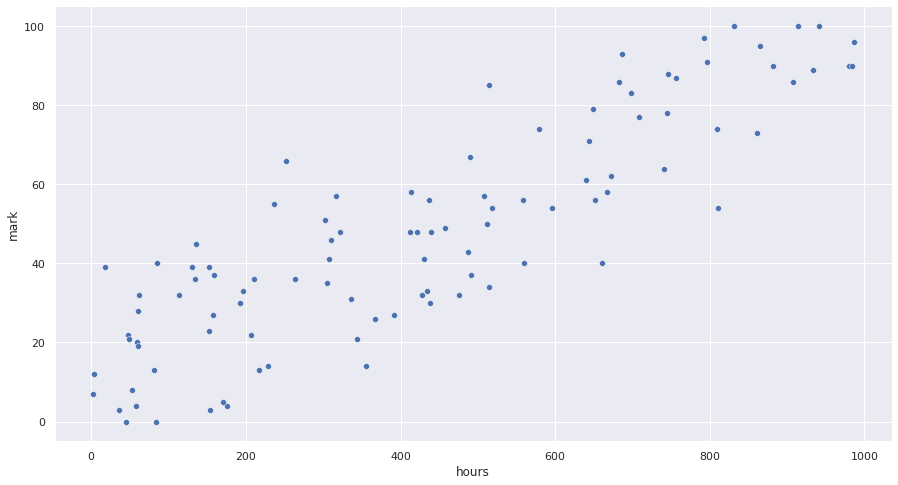

In [ ]:
sns.scatterplot(x=data["hours"], y=data["mark"]);

Vamos a empezar introduciendo unos valores al azar y a ver qué tal resultan.´

Como vemos en el gráfico la relación entre hours y mark es positiva, es decir, a medida que hours crece, mark también. Por lo tanto, la pendiente de la recta tiene que ser positiva

## Primera regresión

In [ ]:
data["predicción_0"] = 0.05 * data['hours'] + 0
data["predicción_1"] = 0.24 * data['hours'] + 10
data["predicción_2"] = 0.08 * data['hours'] + 10
data["predicción_3"] = 0.11 * data['hours'] + 5
data["predicción_4"] = 0.06 * data['hours'] + 9
data

,hours,mark,predicción_0,predicción_1,predicción_2,predicción_3,predicción_4
0,865,95,43.25,217.60,79.20,100.15,60.90
1,4,12,0.20,10.96,10.32,5.44,9.24
2,305,35,15.25,83.20,34.40,38.55,27.30
3,437,56,21.85,114.88,44.96,53.07,35.22
4,682,86,34.10,173.68,64.56,80.02,49.92
...,...,...,...,...,...,...,...
95,252,66,12.60,70.48,30.16,32.72,24.12
96,49,21,2.45,21.76,13.92,10.39,11.94
97,792,97,39.60,200.08,73.36,92.12,56.52
98,310,46,15.50,84.40,34.80,39.10,27.60


In [ ]:
sns.histplot(data['hours'])

Según la primera función que nos hemos inventado cuando un alumno estudia 865 horas previsiblemente tendrá una nota de 91.5, sin embargo mirando para la segunda función tendrá un 113.8.

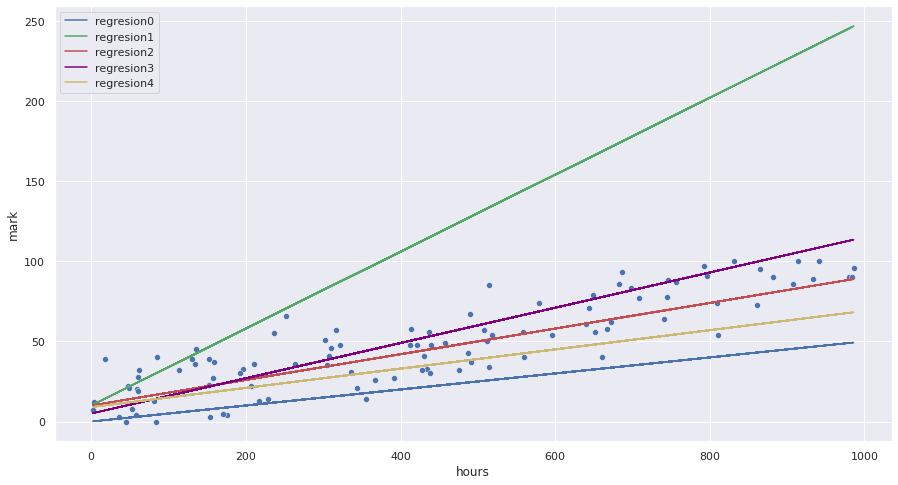

In [ ]:
sns.scatterplot(x=data["hours"], y=data["mark"])
plt.plot(data.hours, data["predicción_0"], color='b', label='regresion0')
plt.plot(data.hours, data["predicción_1"], color='g', label='regresion1')
plt.plot(data.hours, data["predicción_2"], color='r', label='regresion2')
plt.plot(data.hours, data["predicción_3"], color='purple', label='regresion3')
plt.plot(data.hours, data["predicción_4"], color='y', label='regresion4')
plt.legend();

A simple vista, cuál recta creéis que se ajusta mejor a los datos?

Hay una manera matemática de saberlo. La idea es ver la distancia de cada punto a cada una de las rectas. A esta distancia se le llama **residuo** o **error**

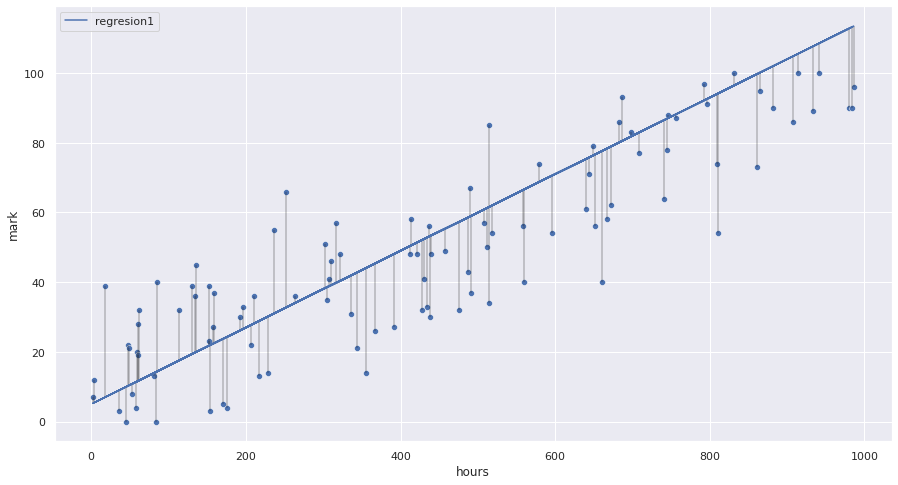

In [ ]:
sns.scatterplot(x=data["hours"], y=data["mark"])
plt.plot(data.hours, data["predicción_3"], color='b', label='regresion1')
#plt.plot(data.hours, data["predicción_2"], color='g', label='refresion2')
plt.vlines(data.hours, data["predicción_3"], data["mark"], lw=0.4)
plt.legend();


In [ ]:
data["error0"] = (data['mark'] - data["predicción_0"]).abs()
data["error1"] = (data['mark'] - data["predicción_1"]).abs()
data["error2"] = (data['mark'] - data["predicción_2"]).abs()
data["error3"] = (data['mark'] - data["predicción_3"]).abs()
data["error4"] = (data['mark'] - data["predicción_4"]).abs()

In [ ]:
data

,hours,mark,predicción_0,predicción_1,predicción_2,predicción_3,predicción_4,error0,error1,error2,error3,error4
0,865,95,43.25,113.80,79.20,100.15,60.90,51.75,18.80,15.80,5.15,34.10
1,4,12,0.20,10.48,10.32,5.44,9.24,11.80,1.52,1.68,6.56,2.76
2,305,35,15.25,46.60,34.40,38.55,27.30,19.75,11.60,0.60,3.55,7.70
3,437,56,21.85,62.44,44.96,53.07,35.22,34.15,6.44,11.04,2.93,20.78
4,682,86,34.10,91.84,64.56,80.02,49.92,51.90,5.84,21.44,5.98,36.08
...,...,...,...,...,...,...,...,...,...,...,...,...
95,252,66,12.60,40.24,30.16,32.72,24.12,53.40,25.76,35.84,33.28,41.88
96,49,21,2.45,15.88,13.92,10.39,11.94,18.55,5.12,7.08,10.61,9.06
97,792,97,39.60,105.04,73.36,92.12,56.52,57.40,8.04,23.64,4.88,40.48
98,310,46,15.50,47.20,34.80,39.10,27.60,30.50,1.20,11.20,6.90,18.40


In [ ]:
print("el error medio de regresion0 es {} ".format(data["error0"].mean()))
print("el error medio de regresion1 es {} ".format(data["error1"].mean()))
print("el error medio de regresion2 es {} ".format(data["error2"].mean()))
print("el error medio de regresion3 es {} ".format(data["error3"].mean()))
print("el error medio de regresion4 es {} ".format(data["error4"].mean()))

residuos = [data["error0"].mean().round(2),
            data["error1"].mean().round(2),
            data["error2"].mean().round(2),
            data["error3"].mean().round(2),
            data["error4"].mean().round(2)]

el error medio de regresion1 es 26.976 
el error medio de regresion2 es 18.073599999999995 
el error medio de regresion3 es 11.894399999999997 
el error medio de regresion4 es 13.341800000000001 
el error medio de regresion5 es 16.937600000000003 


In [ ]:
residuos

[26.98, 18.07, 11.89, 13.34, 16.94]

Por lo tanto, confirmamos que la primera regresión es mejor que la segunda.

## Regresión 2.0

Si profundizamos un poco más, podemos encontrar esta otra expresión:

 $$ Y = \beta_0 +  \beta_1 X + \epsilon$$

Donde:
 * $X$ = variable predictora
 * $Y$ = variable objetivo
 * $\beta_0$ = intersección / intercept 
 * $\beta_1$ = pendiente / slope
 * $\epsilon$ = ruido (gaussiano)


La ecuación anterior se conoce como *línea de regresión poblacional*.
La línea de regresión lineal simple suele tener la forma que se muestra en la fórmula anterior, donde β0 y β1 son constantes desconocidas, que representan la intersección y la pendiente de la línea de regresión, respectivamente. Lo que antes entendíamos como *n* y *horas*

La **intersección (β0)** es el valor de la variable dependiente (Y, nota) cuando la variable independiente (X, horas) tiene un valor de cero (0). 

La **pendiente (β1)**  es una medida de la velocidad a la que cambia la variable dependiente (Y) cuando la variable independiente (X) cambia en uno (1). 

Las constantes β0 y β1 desconocidas (de momento) se denominan coeficientes o parámetros del modelo. Esta forma de la línea de regresión se conoce también como modelo probabilístico, y se ajusta al conjunto de datos de forma **aproximada**.

Ahora ya sabemos calcular una regresión, pero cómo podemos saber que es la mejor?

Cómo podemos optimizar la búsqueda?

El camino es: minimizando los residuos.

Cada vez que probamos una recta se calcula un error medio, que comprende la distancia de todos los puntos a la recta.

In [ ]:
df_residuos = pd.DataFrame(residuos)
df_residuos

,0
0,26.98
1,18.07
2,11.89
3,13.34
4,16.94


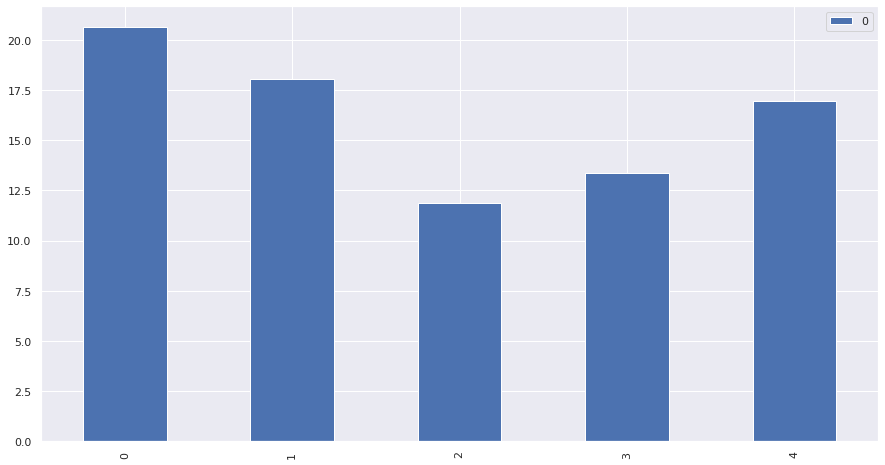

In [ ]:
df_residuos.plot(kind = 'bar');


La línea de regresión número 2 es la mejor, entre las probadas, ni siquiera sabemos si es la mejor de entre todas las posibles, y ni mucho menos sabemos si es buena siquiera


## Regresión con ScikitLearn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


ScikitLearn es una librería, está especializada en modelos de regresión, tanto lineales, como logísticos, de clasificación...

Nosotros le vamos a pedir que haga una simple y lineal, es decir con una sola variable y de potencia 1.

Lo que el método **LinearRegression** va a hacer por nosotros es iterar. Va a probar muchas combinaciones de Beta0 y Beta1 hasta encontrar la función de regresión óptima.

Una vez encontrada evaluaremos cómo de buena es.

En primer lugar definimos el objeto lr, será una función que contiene dentro una serie de métodos estadísticos que son los que utilizaremos y los que nos permitirán realmente hacer la regresión

In [ ]:
lr = LinearRegression() #fit_intercept = False

In [ ]:
lr.fit(data[['hours']],data[['mark']])

LinearRegression(fit_intercept=False)

Ahora ya sí hemos generado el modelo de regresión lineal.

Vamos a imprimir su coeficiente

In [ ]:
lr.coef_

array([[0.10348682]])

In [ ]:
lr.intercept_

0.0

In [ ]:
data["predicción"] = (data['hours'] * lr.coef_[0]) + lr.intercept_
data["predict_SKL"] = lr.predict(data[['hours']])
data

,hours,mark,predicción_0,predicción_1,predicción_2,predicción_3,predicción_4,predicción,predict_SKL
0,865,95,43.25,217.60,79.20,100.15,60.90,89.516102,89.516102
1,4,12,0.20,10.96,10.32,5.44,9.24,0.413947,0.413947
2,305,35,15.25,83.20,34.40,38.55,27.30,31.563481,31.563481
3,437,56,21.85,114.88,44.96,53.07,35.22,45.223742,45.223742
4,682,86,34.10,173.68,64.56,80.02,49.92,70.578014,70.578014
...,...,...,...,...,...,...,...,...,...
95,252,66,12.60,70.48,30.16,32.72,24.12,26.078680,26.078680
96,49,21,2.45,21.76,13.92,10.39,11.94,5.070854,5.070854
97,792,97,39.60,200.08,73.36,92.12,56.52,81.961564,81.961564
98,310,46,15.50,84.40,34.80,39.10,27.60,32.080915,32.080915


In [ ]:
data["error"] = (data.mark - data["predicción"]).abs()

In [ ]:
# Nuestro error ahora es más pequeño que el mejor que teníamos antes
data["error"].mean()

11.402698299019335

## Regresión con Stats Models

Stats Models es otra librería que nos permite hacer modelos de regresión

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

In [ ]:
ols = smf.ols("mark ~ hours", data = data)
ols_fit = ols.fit()
print(ols_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   mark   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     296.9
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           2.04e-31
Time:                        11:41:35   Log-Likelihood:                -404.06
No. Observations:                 100   AIC:                             812.1
Df Residuals:                      98   BIC:                             817.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7807      2.517      4.680      0.0

### Interpretación de los resultados

https://towardsdatascience.com/simple-explanation-of-statsmodel-linear-regression-model-summary-35961919868b

In [ ]:
data["predict_statsM"] = ols_fit.predict(data['hours'])
data

,hours,mark,predicción_0,predicción_1,predicción_2,predicción_3,predicción_4,error0,error1,error2,error3,error4,predicción,predict_SKL,error,predict_statsM
0,865,95,43.25,113.80,79.20,100.15,60.90,51.75,18.80,15.80,5.15,34.10,84.767566,84.767566,10.232434,84.767566
1,4,12,0.20,10.48,10.32,5.44,9.24,11.80,1.52,1.68,6.56,2.76,12.118219,12.118219,0.118219,12.118219
2,305,35,15.25,46.60,34.40,38.55,27.30,19.75,11.60,0.60,3.55,7.70,37.515958,37.515958,2.515958,37.515958
3,437,56,21.85,62.44,44.96,53.07,35.22,34.15,6.44,11.04,2.93,20.78,48.653837,48.653837,7.346163,48.653837
4,682,86,34.10,91.84,64.56,80.02,49.92,51.90,5.84,21.44,5.98,36.08,69.326415,69.326415,16.673585,69.326415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,252,66,12.60,40.24,30.16,32.72,24.12,53.40,25.76,35.84,33.28,41.88,33.043931,33.043931,32.956069,33.043931
96,49,21,2.45,15.88,13.92,10.39,11.94,18.55,5.12,7.08,10.61,9.06,15.915223,15.915223,5.084777,15.915223
97,792,97,39.60,105.04,73.36,92.12,56.52,57.40,8.04,23.64,4.88,40.48,78.607981,78.607981,18.392019,78.607981
98,310,46,15.50,47.20,34.80,39.10,27.60,30.50,1.20,11.20,6.90,18.40,37.937847,37.937847,8.062153,37.937847


# Cómo de bueno es nuestro modelo?

Existen una serie de medidas ya predeterminadas que nos ayudan a saber si nuestro modelo ajusta bien o no.

En este Notebook arriba ya hemos visto uno, el MAE, Minimum Absolute Error



## Errores medios

Cálculo del error medio absoluto, del error medio cuadrático y del error medio cuadrático

- **MAE** es el más fácil de entender, porque es el error medio.
- **El MSE** es más popular que el MAE, porque el MSE "castiga" los errores más grandes, lo que suele ser útil en el mundo real.
- **RMSE** es aún más popular que MSE, es la raíz cuadrada del MSE y mide la desviación estándar de los residuos.
- **MAPE** Mean Absolute Percentage Error, permite comparar el MAE con respecto a la variable dependiente a predecir, es muy útil para saber si el error en bruto (MAE) es mucho o poco comparando con los valores que toma la Variable dependiente

Todas estas son **funciones de pérdida**, porque queremos minimizarlas.

In [ ]:
print("MAE: ", metrics.mean_absolute_error(data['mark'], data['predict_SKL']))
print("MSE: ", metrics.mean_squared_error(data['mark'], data['predict_SKL']))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(data['mark'], data['predict_SKL'])))
print("R2: ", metrics.r2_score(data['mark'], data['predict_SKL']))



MAE:  11.402698299019335
MSE:  189.31609105092303
RMSE:  13.759218402617318
R2:  0.7518130774464549


## $R^2$ - R Cuadrado

La diferencia numérica entre la *línea de regresión de mínimos cuadrados* y el valor real se llama *residuo* , y representa el error en la estimación: $e = y_i - \hat{y}$.     
La línea de regresión minimizó la **Suma de cuadrados residual** (RSS) 

La suma residual de cuadrados mide la cantidad de error restante entre la función de regresión y el conjunto de datos. La suma de cuadrados residuales, también conocida como la suma de los residuos al cuadrado, determina esencialmente qué tan bien un modelo de regresión explica o representa los datos en el modelo.

$$RSS = e_1^2 + e_2^2 + \dots + e_n ^2$$

Si sólo utilizáramos la media como valor predicho para cada predicción, el error que cometeríamos es **suma total de cuadrados**

$$TSS=\Sigma(y_i - \bar{y}_i)^2$$

Este sería el peor escenario, por ello vamos a comparar los residuos generados por nuestra recta de regresión con la **TSS**

Recordemos que los coeficientes de la regresión lineal minimizan el $RSS=Sumatorio(y_i - \hat{y_i})^2$, es decir, la cantidad de variabilidad que queda sin explicar después de realizar la regresión. El [coeficiente de determinación](https://en.wikipedia.org/wiki/Coefficient_of_determination):

$$R^2 = \frac{TSS -RSS}{TSS} = 1-\frac{RSS}{TSS}$$

mide la "*proporción de variabilidad en Y que puede explicarse mediante X*". Es una medida de la relación lineal que existe entre $X$ e $y$.

**Nota:** en el caso de la regresión lineal simple, el coeficiente $R^2$ no es más que el cuadrado del coeficiente de correlación de *Pearson*  

Como vemos si el **RSS** es muy parecido a **TSS** el resultado de $R^2$ es muy bajo. 

Si nuestros residuos RSS son parecidos al peor escenario nuestro modelo no ajusta bien



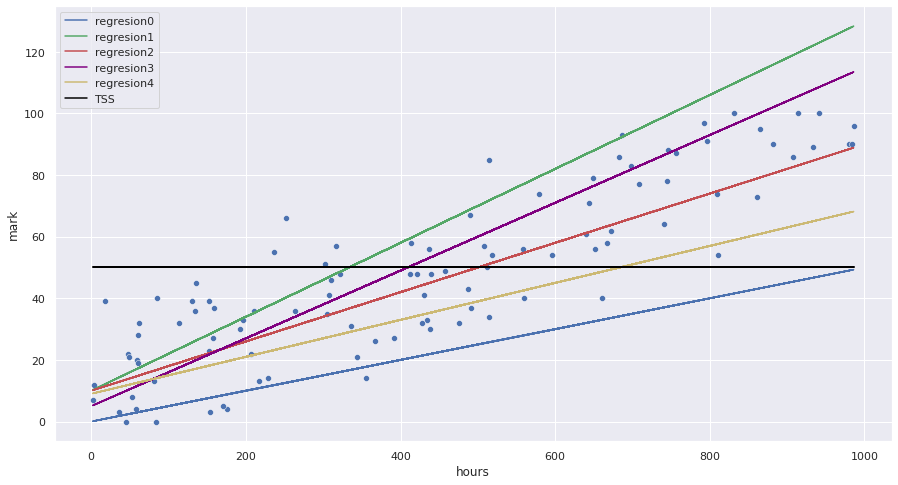

In [ ]:
sns.scatterplot(x=data["hours"], y=data["mark"])
plt.plot(data.hours, data["predicción_0"], color='b', label='regresion0')
plt.plot(data.hours, data["predicción_1"], color='g', label='regresion1')
plt.plot(data.hours, data["predicción_2"], color='r', label='regresion2')
plt.plot(data.hours, data["predicción_3"], color='purple', label='regresion3')
plt.plot(data.hours, data["predicción_4"], color='y', label='regresion4')
plt.plot(data.hours, [50 for i in range(100)], color='black', label='TSS')
plt.legend();

# Standarización

La normalización (standardización, tipificación) es el proceso por el cual una variable es centrada en su media. Es decir, calculamos la media de una variable y se la restamos a todos lo valores que toma.

Posteriormente se divide cada observación por la desviación típica de la variable original. De este modo tenemos que la mayoría de individuos tomando valores entre -1 y 1.

Este proceso es aplicado cuando tenemos variables explicativas con escalas o unidades de medida muy diferentes, por ejemplo una variable se mide centenas y la otra en millones. 

Gracias a la normalización optimizamos el entrenamiento del modelo y facilitamos la interpretación.

La tipificación solo se aplica en modelo multivariables, es decir con más de una variable explicativa.

https://stats.stackexchange.com/questions/29781/when-conducting-multiple-regression-when-should-you-center-your-predictor-varia

In [ ]:
scaler = StandardScaler()
minmax = MinMaxScaler()
data['hours_st'] = scaler.fit_transform(data[['hours']])
data['hours_MM'] = minmax.fit_transform(data[['hours']])
data

,hours,mark,predicción_0,predicción_1,predicción_2,predicción_3,predicción_4,predicción,predict_SKL,error,hours_st,hours_MM
0,865,95,43.25,217.60,79.20,100.15,60.90,89.516102,89.516102,5.483898,1.537849,0.877033
1,4,12,0.20,10.96,10.32,5.44,9.24,0.413947,0.413947,11.586053,-1.495850,0.002033
2,305,35,15.25,83.20,34.40,38.55,27.30,31.563481,31.563481,3.436519,-0.435288,0.307927
3,437,56,21.85,114.88,44.96,53.07,35.22,45.223742,45.223742,10.776258,0.029808,0.442073
4,682,86,34.10,173.68,64.56,80.02,49.92,70.578014,70.578014,15.421986,0.893056,0.691057
...,...,...,...,...,...,...,...,...,...,...,...,...
95,252,66,12.60,70.48,30.16,32.72,24.12,26.078680,26.078680,39.921320,-0.622032,0.254065
96,49,21,2.45,21.76,13.92,10.39,11.94,5.070854,5.070854,15.929146,-1.337294,0.047764
97,792,97,39.60,200.08,73.36,92.12,56.52,81.961564,81.961564,15.038436,1.280637,0.802846
98,310,46,15.50,84.40,34.80,39.10,27.60,32.080915,32.080915,13.919085,-0.417671,0.313008


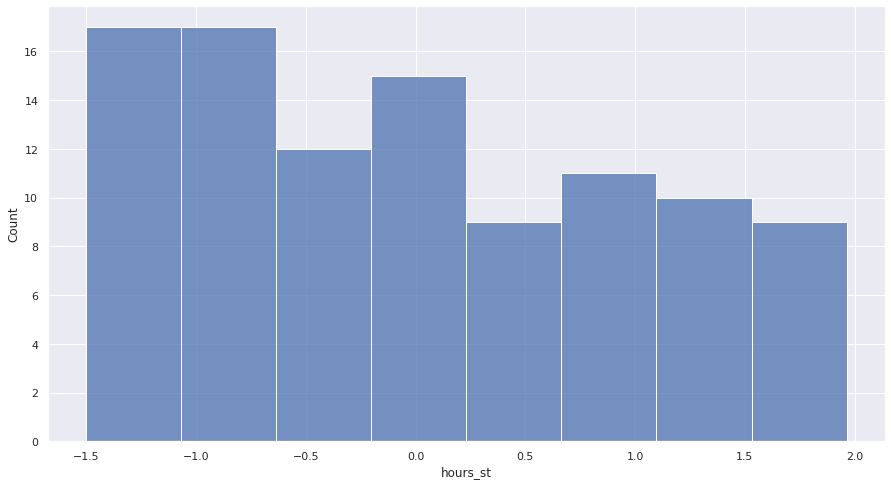

In [ ]:
sns.histplot(data['hours_st'])

MinMax scaler es otro método de estandarización, consiste en restar a cada valor el mínimo y dividirlo entre el rango de valores (max - min).

Con este método tenemos todas las observaciones acotadas entre 0 y 1, y además nos aseguramos de no tener valores negativos.

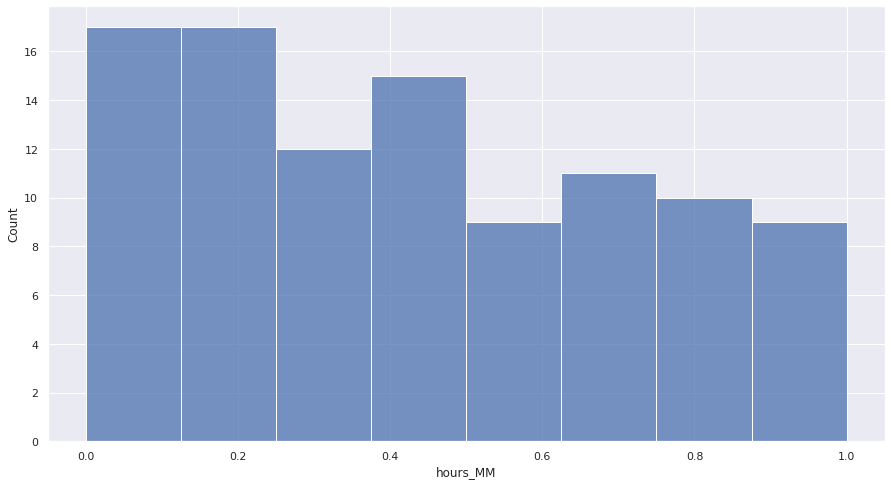

In [ ]:
sns.histplot(data['hours_MM'])